In [3]:
# ridge regression -> L2 regularization (euclidean distance)
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection as modsel
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
# loading model and initializing ridge object
boston = datasets.load_boston()
ridge = linear_model.Ridge()
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [16]:
print("boston target shape : ",boston.target.shape)
print("boston data shape : ", boston.data.shape)

boston target shape :  (506,)
boston data shape :  (506, 13)


In [19]:
#splitting dataset
x_train, x_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size = 0.1, random_state = 42)

In [23]:
# trainingn model
print("Training model : ",ridge.fit(x_train, y_train))
print("Error : ", metrics.mean_squared_error(y_train, ridge.predict(x_train))) 
#  22.739484154236614 for linear regression
print("score : ", ridge.score(x_train, y_train))
#  0.73749340919011974 for linear regression

Training model :  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Error :  22.926424500454313
score :  0.7353353535087519


In [27]:
# testing the model
y_pred = ridge.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)
# 15.010997321630166 for linear regression

14.785888941249887

Text(0,0.5,'Predicted values')

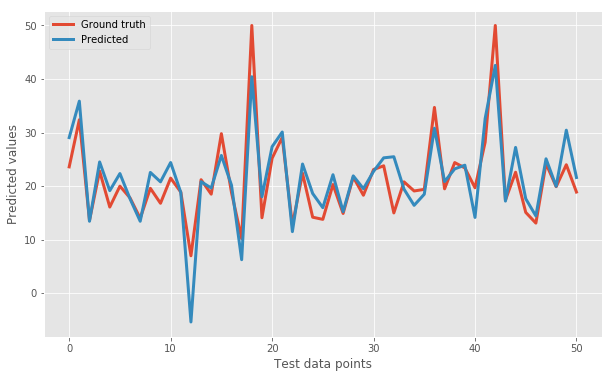

In [33]:
plt.figure(figsize = (10, 6))
plt.plot(y_test, linewidth = 3, label = "Ground truth")
plt.plot(y_pred, linewidth = 3, label = "Predicted")
plt.legend(loc="best")
plt.xlabel("Test data points")
plt.ylabel("Predicted values")

Text(-5,50,'MSE = 14.786')

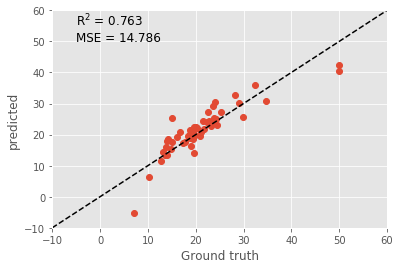

In [38]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel("Ground truth")
plt.ylabel("predicted")
score = 'R$^2$ = %.3f' %ridge.score(x_test, y_test)
error = 'MSE = %.3f' %metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 55, score, size = 12)
plt.text(-5, 50, error, size = 12)